#### Import packages

In [1]:
import numpy as np; pi = np.pi
import scipy.io as spio
import networkx as nx
import sys
import bisect
from qutip import *
from qutip.qip.operations.gates import gate_expand_2toN, gate_expand_1toN
import matplotlib as mpl
import matplotlib.pyplot as plt
from ptm.ptm import PTM
from matplotlib import cm
from ptm.ptm import *

#### Import Max Cut problem

Number of qubits = 8


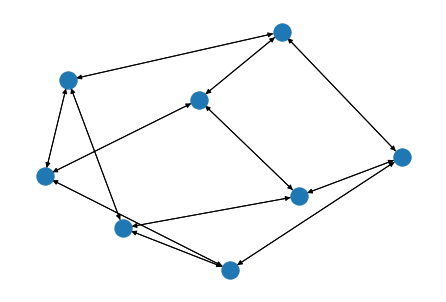

In [20]:
import scipy.io as spio
filename = 'instance_8_1'
mat = spio.loadmat("instances/" + filename + ".mat")
instance = mat['instance']
cost = instance['cost'][0,0]
r = instance['approxr'][0,0] # approximation ratio
graph = instance['graph'][0,0]
J = graph.todense()/2
G = nx.DiGraph(graph.todense()) # create graph
N = int(np.log2(len(cost)))
C = Qobj(np.diag(cost.flatten()), dims = [[2]*N, [2]*N]) # Quantum Hamiltonian
print("Number of qubits =",N)
nx.draw(G)
plt.show()

#### Ideal PTM

In [13]:
# Iteration level
p = 1
gamma = instance['gamma'][0,0][0][p-1].flatten()
beta = instance['beta'][0,0][0][p-1].flatten()

psi = (basis(2,0) + basis(2,1)).unit()
rho = ket2dm(tensor([psi for i in range(N)]))
rho_vec = rho_to_pauli_basis(rho)

U = 1
for i in range(p):
    temp1 = carb_ptm(gamma[i])
    temp2 = rx_ptm(2*beta[i])
    for j in range(N-1):
        for k in range(j+1,N):
            if J[j,k] != 0.:
                U = ptm_expand_2toN(temp1, N=N, targets=[j,k]) * U
    for j in range(N):   
        U = ptm_expand_1toN(temp2, N=N, target=j) * U
rho_final = pauli_basis_to_rho(U*rho_vec)

#### Calculate the success probability and the approximation ratio

In [15]:
cost_min = min(cost)
z = np.argwhere(cost == cost_min) 

In [16]:
success = np.real(sum(rho_final[int(z[i,0]),int(z[i,0])] for i in range(len(z))))*100
print("Success Probability = %s %%" %round(success,2))

Success Probability = 32.17 %


In [17]:
# expectation value
expval = (C*rho_final).tr()
approxr = expval / cost_min[0]
print("Approximation Ratio = %s" %round(approxr,3))

Approximation Ratio = 0.831


#### CV PTM

In [23]:
cv_ptm = PTM()

In [ ]:
p = 1
temp1 = cv_ptm.carb(gamma[0])
qsave(temp1, "results/"+filename+"_carb_p_1_1")

50.0%. Run time: 106.76s. Est. time left: 00:00:01:46
Total run time: 106.76s
50.0%. Run time: 101.50s. Est. time left: 00:00:01:41
Total run time: 101.50s
50.0%. Run time:  99.32s. Est. time left: 00:00:01:39
Total run time:  99.32s


#### Optimization problem

In [ ]:
temp2 = cv_ptm.rx(2*beta[i])

In [32]:
# Iteration level
p = 1
gamma = instance['gamma'][0,0][0][p-1].flatten()
beta = instance['beta'][0,0][0][p-1].flatten()

psi = (basis(2,0) + basis(2,1)).unit()
rho = ket2dm(tensor([psi for i in range(N)]))
rho_vec = rho_to_pauli_basis(rho)

U = 1
for i in range(p):
    for j in range(N-1):
        for k in range(j+1,N):
            if J[j,k] != 0.:
                U = ptm_expand_2toN(temp1, N=N, targets=[j,k]) * U
    for j in range(N):   
        U = ptm_expand_1toN(temp2, N=N, target=j) * U
rho_final = pauli_basis_to_rho(U*rho_vec)

#### Calculate the success probability and the approximation ratio

In [34]:
rho_final.tr()

1.000105786847504

In [35]:
cost_min = min(cost)
z = np.argwhere(cost == cost_min) 

In [36]:
success = np.real(sum(rho_final[int(z[i,0]),int(z[i,0])] for i in range(len(z))))*100
print("Success Probability = %s %%" %round(success,2))

Success Probability = 37.66 %


In [37]:
# expectation value
expval = (C*rho_final).tr()
approxr = expval / cost_min[0]
print("Approximation Ratio = %s" %round(approxr,3))

Approximation Ratio = 0.838
